# Lab: Ciphers
In this lab, you will write a program that implements a cipher, which allows you to encrypt and decrypt secret messages. You'll get practice with string processing tasks like iterating through strings and calling new string methods. 

## Encryption and the Caesar cipher

Encryption is the proceses of transforming a message into a new form that obscures its meaning. Encryption is important in many computer applications where sensitive information is involved - e.g., accessing your bank account over the Internet, databases that store customer Social Security Numbers, etc. A message that has not been encrypted is called _plaintext_ whereas a message that has been encrypted is called _ciphertext_.

The Caesar cipher is an early encryption algorithm that was famously used by Julius Caesar. It works by substituting every letter with the letter that is three positions before it in the alphabet. For instance, the plaintext message

`"i came i saw i conquered"`

would be encrypted as

`"f zxjb f pxt f zlknrboba"`

Note that it wraps around the alphabet, so `"c"` becomes `"z"` and `"a"` becomes `"x"`. The full substitution table is as follows:

<table>
<tr> <td>plaintext character </td><td> a </td><td> b </td><td> c </td><td> d </td><td> e </td><td> f </td><td> g </td><td> h </td><td> i </td><td> j </td><td> k </td><td> l </td><td> m </td><td> n </td><td> o </td><td> p </td><td> q </td><td> r </td><td> s </td><td> t </td><td> u </td><td> v </td><td> w </td><td> x </td><td> y </td><td> z </td><td></td></tr>
<tr><td>ciphertext character </td><td> x </td><td> y </td><td> z </td><td> a </td><td> b </td><td> c </td><td> d </td><td> e </td><td> f </td><td> g </td><td> h </td><td> i </td><td> j </td><td> k </td><td> l </td><td> m </td><td> n </td><td> o </td><td> p </td><td> q </td><td> r </td><td> s </td><td> t </td><td> u </td><td> v </td><td> w </td><td></td></tr>
    </table>

To decrypt the message, you would reverse this process, and substitute each ciphertext character with the character that is three positions later in the alphabet.

In order for the encrypted message to be private, only the intended receiver should know the secret of how it was encrypted.

## Unicode character codes

Previously, you saw that each character in a string is represented by a numerical code. Modern character codes are defined by the Unicode standard. You can find a list of a whole bunch of characters and their equivalent codes here: https://en.wikipedia.org/wiki/List_of_Unicode_characters (see the Decimal column in these tables to find the number). (Note that this is similar to encyption - there is a number that represents every letter; however, it is not actually encryption because the table of substitutions is public knowledge.)

Python provides a built-in function called `ord()` (short for "ordinal"), which will tell you the Unicode number for any given character.

In [1]:
ord("!")

33

Similarly, the `chr()` function will let you do the reverse - look up the character for a Unicode number:

In [2]:
chr(120)

'x'

__Exercise 1:__ Try `ord()` and `chr()` with several different characters (e.g., "a", "b", "c", "q", "A", "B", "C", "Q", "?", ":", " ", etc.) and several different numbers (97, 98, 99, 120, 65, 66, 67, 88, 33, etc.). Convince yourself that `ord()` and `chr()` really do the inverse operation (looking up the code for a character and a character for a code). Answer the following in your notes.

* Are all of the lowercase letters in a row?
* Are all of the uppercase letters in a row?
* What is really happening when you do comparisons like `"a" < "b"` and `"a" < "B"`?

## Using `ord()` and `char()` to implement the Caesar cipher

To implement the Caesar cipher, we need to be able to convert a plaintext character into a unicode character. One way we might do that in several steps is like this:


Let's say we have a plaintext character, `"i"`. We start by getting its unicode number like this:

In [3]:
plaintext_character = "i"
plaintext_unicode = ord(plaintext_character)
print(plaintext_unicode)

105


We can then figure out what position in the actual alphabet this number is by subtracting the Unicode number for `"a"` since `"a"` is first, and they're all in order.

In [4]:
plaintext_alphabet_position = plaintext_unicode - ord("a")
print(plaintext_alphabet_position)

8


Now we are going to convert this into a ciphertext character by subtracting 3. We'll also take the result modulo 26 - this will make sure that if we have `"a"`, `"b"`, or `"c"`, it will wrap around to the other side of the alphabet instead of giving us a negative number (i.e., because `-1 % 26` is 25, `-2 % 26` is 24, and `-3 % 26` is 23).

In [5]:
ciphertext_alphabet_position = (plaintext_alphabet_position - 3) % 26
print(ciphertext_alphabet_position)

5


We then add the Unicode number for `"a"` back on to get an appropriate Unicode number for our ciphertext character.

In [6]:
ciphertext_unicode = ciphertext_alphabet_position + ord("a")
print(ciphertext_unicode)

102


And, then we convert that into an actual character with `chr()`.

In [7]:
ciphertext_character = chr(ciphertext_unicode)
print(ciphertext_character)

f


Putting it all together...

In [8]:
plaintext_character = "i"
plaintext_unicode = ord(plaintext_character)
plaintext_alphabet_position = plaintext_unicode - ord("a")
ciphertext_alphabet_position = (plaintext_alphabet_position - 3) % 26
ciphertext_unicode = ciphertext_alphabet_position + ord("a")
ciphertext_character = chr(ciphertext_unicode)
print(ciphertext_character)

f


__Exercise 2:__ Write a function that does all this called `encrypt_letter()` that takes a string with one letter as an argument and returns the equivalent ciphertext character.


<p>
<div>
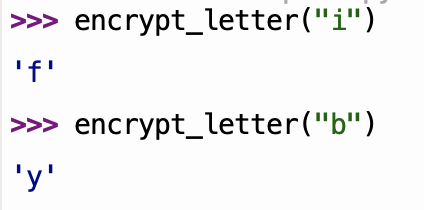
</div>
</p>


## Encrypting a whole message

Recall that you can loop through a string just like you can a list.

In [9]:
my_string = "icameisawiconquered"

counter = 0
while counter < len(my_string):
    print(my_string[counter])
    counter += 1

i
c
a
m
e
i
s
a
w
i
c
o
n
q
u
e
r
e
d


__Exercise 3:__ Write a new function that encrypts a whole message by doing the following:
* take the message to be encrypted as an argument 
* loop through each letter in the message
* use the function you wrote above to convert that letter to its ciphertext equivalent
* add the ciphertext letter on to an accumulator variable

Note that string accumulator variables work just like numeric ones, except the string grows in size. E.g., 

In [10]:
str_accum = ""
str_accum += "h"
str_accum += "e"
str_accum += "l"
str_accum += "l"
str_accum += "o"
print(str_accum)

hello


Call your function `encrypt_message()`. It should work like this.

<p>
<div>
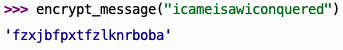
</div>
</p>

__Challenge Exercise 4:__ As is, your function doesn't handle uppercase letters or things like spaces or punctuation - it will incorrectly convert them to some lowercase letter or cause an error. We want to instead convert any uppercase letters to lowercase and ignore any character that isn't a letter - simply include the same plaintext values in the ciphertext. The result should look like this:


<p>
<div>
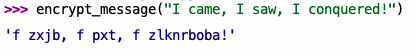
</div>
</p>

In order to support this, you will need to change your `encrypt_message()` function to 
* convert the plaintext string to all lowercase before finding its ciphertext
* while converting to ciphertext, only call `encrypt_letter()` on letters; otherwise, just add the non-letter character onto your accumulator variable

_Hint:_ There are string methods for both of these things. Look to see what you can find at https://www.w3schools.com/python/python_ref_string.asp

## Optional extra

Most encryption algorithms don't require the algorithm itself to be secret. Instead, they rely on encryption _keys_. For the Caesar cipher, you could add a key to the algorithm by using a different alphabet shifting amount (other than 3), and you can agree to this _key_ value ahead of time with the person you want to communicate with privately.

__Optional Exercise 5:__ Change your algorithm so that it supports using a key. For the Caesar cipher, this can also allow you to decrypt the message by using the negative version of the key. For example:


<p>
<div>
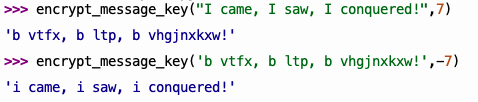
</div>
</p>